<a href="https://colab.research.google.com/github/erlonL/testes-inferencia/blob/main/Teste_Bartlett.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import math
import scipy

In [ ]:
def treat_values(values):
    values = [round(x, ndigits=1) for x in values]
    values = np.array(values)
    return values

In [ ]:
# k = número de amostras
# n = quantidade de valores na amostra

def criaTabela(k, n):
  tabela = pd.DataFrame(columns=[f"col_{i}" for i in range(1, k+1)])

  #population = range(1, 100)
  for i in range(1, k+1):
    tabela[f'col_{i}'] = treat_values(np.random.normal(loc=800, scale=100, size=n))

  return tabela

In [ ]:
tabela1 = criaTabela(3, 14)
print(tabela1)

    col_1  col_2   col_3
0   764.4  733.9   763.3
1   830.1  741.5   870.7
2   764.2  744.4   684.3
3   733.1  799.9  1009.5
4   846.9  694.7   726.7
5   584.6  668.6   840.8
6   695.0  647.6   718.1
7   641.3  704.2   453.8
8   873.5  883.1   700.5
9   724.8  714.7   558.2
10  604.9  848.6   905.8
11  799.2  650.4   987.2
12  693.3  731.9   834.9
13  874.3  841.3   769.2


In [ ]:
n = len(tabela1)
k = len(tabela1.columns)
N = n*k
print(n, k, N)

14 3 42


In [ ]:
var = []
for i in range(1, len(tabela1.columns)+1):
  var.append(np.var(tabela1[f'col_{i}']))

print(var)

[8312.242040816329, 5124.28857142857, 21702.94632653062]


In [ ]:
dp = []
for i in range(1, len(tabela1.columns)+1):
  dp.append(np.std(tabela1[f'col_{i}']))

print(dp)

[91.17149796299461, 71.58413631125663, 147.3191987710041]


In [ ]:
sum(var)

35139.47693877552

varianciap = $S^2p$

In [ ]:
varianciap = ((n-1)*(sum(var))) / N-k
print(varianciap)

10873.504766763852


In [ ]:
logvarianciap = math.log(varianciap)

logs = []

for i in range(k):
  logs.append(math.log(var[i]))

print(logs)
print(logvarianciap)

[9.025484651798836, 8.541746979039859, 9.98520330572806]
9.294084353792526


In [ ]:
q = ((N-k) * logvarianciap) - ((n-1) * (sum(logs)))
print(q)

4.287635622540677


In [ ]:
(N-k) * logvarianciap

362.4692897979085

In [ ]:
(n-1) * (sum(logs))

358.18165417536784

In [ ]:
c = 1 + (1 / (3 * (k - 1))) * ((k / (n - 1)) - (1 / ((n*k)-k)))
print(c)

1.0341880341880343


In [ ]:
b = q / c
b

4.145895601960819

In [ ]:
# GRAU DE LIBERDADE: 2

Bcalc = scipy.stats.chi2.cdf(b, df=(k-1)) # valor seguindo a distribuição qui-quadrado
print(Bcalc)

0.8741856411566897


In [ ]:
Xc1 = q / (1+c)
Xc1

2.107787259820417

In [ ]:
# GRAU DE LIBERDADE: 2

pvalor = scipy.stats.chi2.cdf(Xc1, df=(k-1)) # valor seguindo a distribuição qui-quadrado
pvalor = 1 - pvalor
print(pvalor)

0.34857787017517483


In [ ]:
# https://www.geeksforgeeks.org/how-to-perform-bartletts-test-in-python/

scipy.stats.bartlett(tabela1['col_1'], tabela1['col_2'], tabela1['col_3'])

BartlettResult(statistic=6.950965312823319, pvalue=0.03094689350137647)

In [ ]:
# p = k-1 (grau de liberdade)

def bartlett_critico(p):
  if p <= 20:
    X2c = [0, 3.841, 5.991, 7.815, 9.488, 11.071, 12.592, 14.067, 15.507, 16.919, 18.307,
          19.675, 21.026, 22.362, 23.685, 24.996, 26.296, 27.587, 28.869, 30.144, 31.410]
    b_critico = X2c[p]
  else:
    pass

  return b_critico

In [ ]:
b_critico = bartlett_critico(k-1)

In [ ]:
if Bcalc > b_critico:
  print("Com 95% de confiança, rejeitamos H0")
else:
  print("Com 95% de confiança, aceitamos H0")

Com 95% de confiança, aceitamos H0


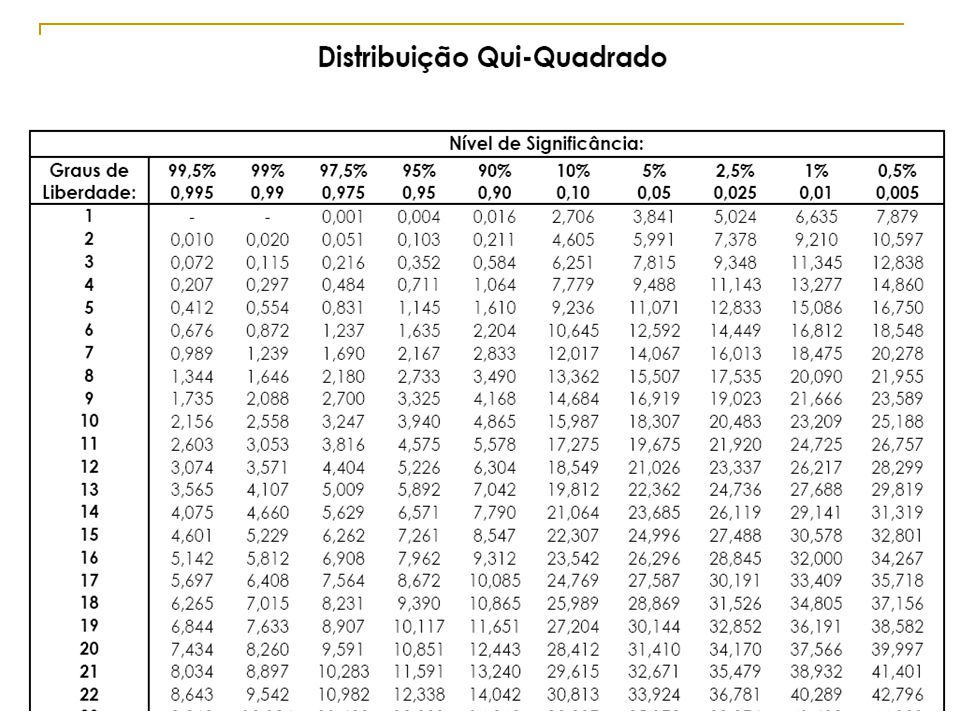

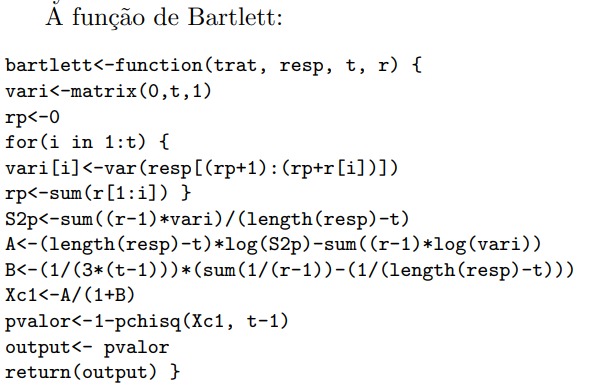